# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('cleaned_cars.csv')

df.head()

,url,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery_color,year,country
0,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4,5,front,134.000000,used,metallic,2011.0,it
1,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4,5,front,160.222222,used,metallic,2010.0,es
2,https://www.autoscout24.com/offers/renault-oth...,renault,clio,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,4,5,front,120.425532,used,alcantara,1963.0,be
3,https://www.autoscout24.com/offers/opel-antara...,opel,antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5,5,4wd,229.000000,used,metallic,2008.0,nl
4,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4,4,front,136.750000,employee's car,black,2023.0,de


In [3]:
# Drop the url column
df = df.drop('url', axis=1)

df.head()

,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery_color,year,country
0,alfa romeo,159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4,5,front,134.000000,used,metallic,2011.0,it
1,alfa romeo,159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4,5,front,160.222222,used,metallic,2010.0,es
2,renault,clio,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,4,5,front,120.425532,used,alcantara,1963.0,be
3,opel,antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5,5,4wd,229.000000,used,metallic,2008.0,nl
4,alfa romeo,giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4,4,front,136.750000,employee's car,black,2023.0,de


In [4]:
# Use a unique id for each model (brand + model)
df['model'] = df['brand'] + '_' + df['model']

df.head()

,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery_color,year,country
0,alfa romeo,alfa romeo_159,5500.0,233685.0,diesel,red,manual,136.0,1956.0,dealer,sedan,4,5,front,134.000000,used,metallic,2011.0,it
1,alfa romeo,alfa romeo_159,13990.0,134000.0,gasoline,red,manual,200.0,1742.0,dealer,sedan,4,5,front,160.222222,used,metallic,2010.0,es
2,renault,renault_clio,2300.0,27000.0,gasoline,yellow,manual,80.0,800.0,dealer,sedan,4,5,front,120.425532,used,alcantara,1963.0,be
3,opel,opel_antara,3499.0,212575.0,gasoline,black,manual,140.0,2405.0,dealer,off-road/pick-up,5,5,4wd,229.000000,used,metallic,2008.0,nl
4,alfa romeo,alfa romeo_giulia,39800.0,7100.0,gasoline,white,automatic,280.0,1995.0,dealer,sedan,4,4,front,136.750000,employee's car,black,2023.0,de


In [5]:
# Shuffle the data
df = df.sample(frac=1, random_state=0)

In [6]:
# Columns to one-hot encode
one_hot_encode_cols = ['brand', 'model', 'fuel_type', 'gearbox', 'color', 'seller', 'body_type', 'drivetrain', 'country', 'condition', 'upholstery_color']

# One-hot encode the columns
df = pd.get_dummies(df, columns=one_hot_encode_cols)

# Model selection

In [7]:
# Split the data into features and target
y = df['price']
X = df.drop('price', axis=1)

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print shapes of the training, validation, and testing sets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(8248, 1186)
(2750, 1186)
(2750, 1186)
(8248,)
(2750,)
(2750,)


In [8]:
# Instantiate the model
rf = RandomForestRegressor(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
train_preds = rf.predict(X_train)
val_preds = rf.predict(X_val)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, train_preds)
val_mse = mean_squared_error(y_val, val_preds)

print('Train MSE:', train_mse)
print('Validation MSE:', val_mse)

Train MSE: 10332242.351332368
Validation MSE: 91383638.4719832


In [9]:
# Make predictions on the test set
test_preds = rf.predict(X_test)

# Print regression metrics
test_mse = mean_squared_error(y_test, test_preds)
print('Test RMSE:', np.sqrt(test_mse))  
# r-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, test_preds)
print('Test R2:', r2)

# Print the results on a few test set examples
for i in range(50):
    print('Predicted:', test_preds[i])
    print('Actual:', y_test[i])
    print()

Test RMSE: 9359.85952968127
Test R2: 0.8696979063727275
Predicted: 16625.55
Actual: 18490.0

Predicted: 26276.03
Actual: 26480.0

Predicted: 16454.46
Actual: 16599.0

Predicted: 11646.05
Actual: 7450.0

Predicted: 16920.57
Actual: 21450.0

Predicted: 12377.29
Actual: 13900.0

Predicted: 18245.09
Actual: 12000.0

Predicted: 25900.118333333332
Actual: 26461.0

Predicted: 59164.52
Actual: 56980.0

Predicted: 27877.35
Actual: 28900.0

Predicted: 60868.97
Actual: 55900.0

Predicted: 6848.69
Actual: 4990.0

Predicted: 18356.36
Actual: 17900.0

Predicted: 12847.8
Actual: 16990.0

Predicted: 24939.19
Actual: 20940.0

Predicted: 18353.18
Actual: 17150.0

Predicted: 45547.77
Actual: 48845.0

Predicted: 27330.73
Actual: 24400.0

Predicted: 111101.66
Actual: 89900.0

Predicted: 15761.93
Actual: 10000.0

Predicted: 13994.14
Actual: 14250.0

Predicted: 19575.22
Actual: 16500.0

Predicted: 6826.79
Actual: 12900.0

Predicted: 14019.55
Actual: 5000.0

Predicted: 17601.46
Actual: 18090.0

Predicted: 142

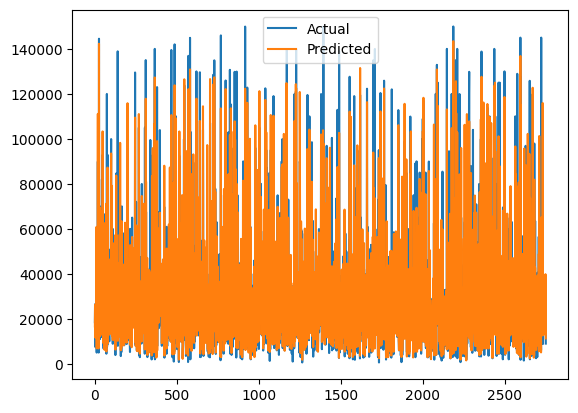

In [10]:
# Plot the comparison between the actual and predicted prices
plt.plot(y_test, label='Actual')
plt.plot(test_preds, label='Predicted')
plt.legend()
plt.show()

In [11]:
# Instantiate the model
xgb = XGBRegressor(random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
train_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_val)

# Calculate the mean squared error
train_mse = mean_squared_error(y_train, train_preds)
val_mse = mean_squared_error(y_val, val_preds)

print('Train MSE:', train_mse)
print('Validation MSE:', val_mse)

Train MSE: 19594127.53527433
Validation MSE: 78333990.77280873


In [12]:
# Make predictions on the test set
test_preds = xgb.predict(X_test)

# Print regression metrics
test_mse = mean_squared_error(y_test, test_preds)
print('Test RMSE:', np.sqrt(test_mse))

# r-squared
r2 = r2_score(y_test, test_preds)
print('Test R2:', r2)

# Print the results on a few test set examples
for i in range(20):
    print('Predicted:', test_preds[i])
    print('Actual:', y_test[i])
    print()

Test RMSE: 8903.63901235894
Test R2: 0.8820907656629056
Predicted: 18056.967
Actual: 18490.0

Predicted: 26936.576
Actual: 26480.0

Predicted: 18954.139
Actual: 16599.0

Predicted: 9690.068
Actual: 7450.0

Predicted: 16379.401
Actual: 21450.0

Predicted: 12604.485
Actual: 13900.0

Predicted: 19539.908
Actual: 12000.0

Predicted: 30799.744
Actual: 26461.0

Predicted: 44897.598
Actual: 56980.0

Predicted: 28487.09
Actual: 28900.0

Predicted: 63384.375
Actual: 55900.0

Predicted: 6278.8574
Actual: 4990.0

Predicted: 15874.593
Actual: 17900.0

Predicted: 12460.662
Actual: 16990.0

Predicted: 26487.84
Actual: 20940.0

Predicted: 17687.688
Actual: 17150.0

Predicted: 47065.6
Actual: 48845.0

Predicted: 26428.23
Actual: 24400.0

Predicted: 91194.25
Actual: 89900.0

Predicted: 17115.338
Actual: 10000.0



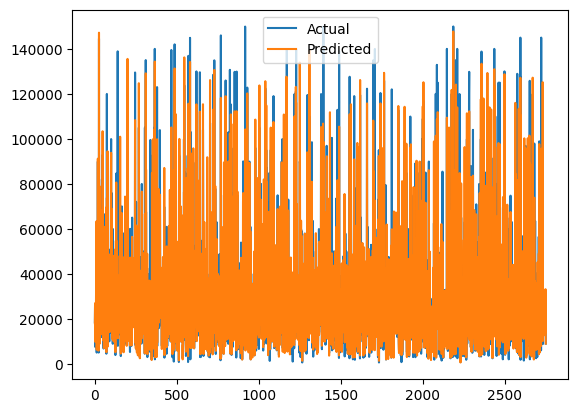

In [13]:
# Plot a comparison of the actual and predicted prices
plt.plot(y_test, label='Actual')
plt.plot(test_preds, label='Predicted')
plt.legend()
plt.show()